<a href="https://colab.research.google.com/github/jm042524/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##テーマ：Numpy
Numpyを利用して、ニューラルネットワークを作る。


In [74]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
! wget 'https://drive.google.com/uc?export=download&id=1h--eJCs-CIjIumI5CZEOnZTyrnoryQ6k' -O setumei.png

--2023-01-12 07:44:07--  https://drive.google.com/uc?export=download&id=1h--eJCs-CIjIumI5CZEOnZTyrnoryQ6k
Resolving drive.google.com (drive.google.com)... 108.177.97.101, 108.177.97.100, 108.177.97.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rvi83flk53i3su0lu3ekungmkbde0488/1673509425000/15307937988973890921/*/1h--eJCs-CIjIumI5CZEOnZTyrnoryQ6k?e=download&uuid=72d22539-3d71-4c24-94b3-6da933705864 [following]
--2023-01-12 07:44:09--  https://doc-0c-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rvi83flk53i3su0lu3ekungmkbde0488/1673509425000/15307937988973890921/*/1h--eJCs-CIjIumI5CZEOnZTyrnoryQ6k?e=download&uuid=72d22539-3d71-4c24-94b3-6da933705864
Resolving doc-0c-ao-docs.googleusercontent.com (doc-0c-ao-docs.googleusercontent.com)... 64.233.189.132, 2404:

In [76]:
! wget 'https://drive.google.com/uc?export=download&id=1JldoAGPxJxz_S7ChQ8ui3ih2kL-NjmCq' -O train.csv

--2023-01-12 07:44:09--  https://drive.google.com/uc?export=download&id=1JldoAGPxJxz_S7ChQ8ui3ih2kL-NjmCq
Resolving drive.google.com (drive.google.com)... 108.177.97.101, 108.177.97.100, 108.177.97.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dlnn3cdn67ga3m5q6mfl1frm6s774js8/1673509425000/15307937988973890921/*/1JldoAGPxJxz_S7ChQ8ui3ih2kL-NjmCq?e=download&uuid=c27a9290-3db9-40ef-8451-a41ac399d409 [following]
--2023-01-12 07:44:12--  https://doc-00-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dlnn3cdn67ga3m5q6mfl1frm6s774js8/1673509425000/15307937988973890921/*/1JldoAGPxJxz_S7ChQ8ui3ih2kL-NjmCq?e=download&uuid=c27a9290-3db9-40ef-8451-a41ac399d409
Resolving doc-00-ao-docs.googleusercontent.com (doc-00-ao-docs.googleusercontent.com)... 64.233.189.132, 2404:

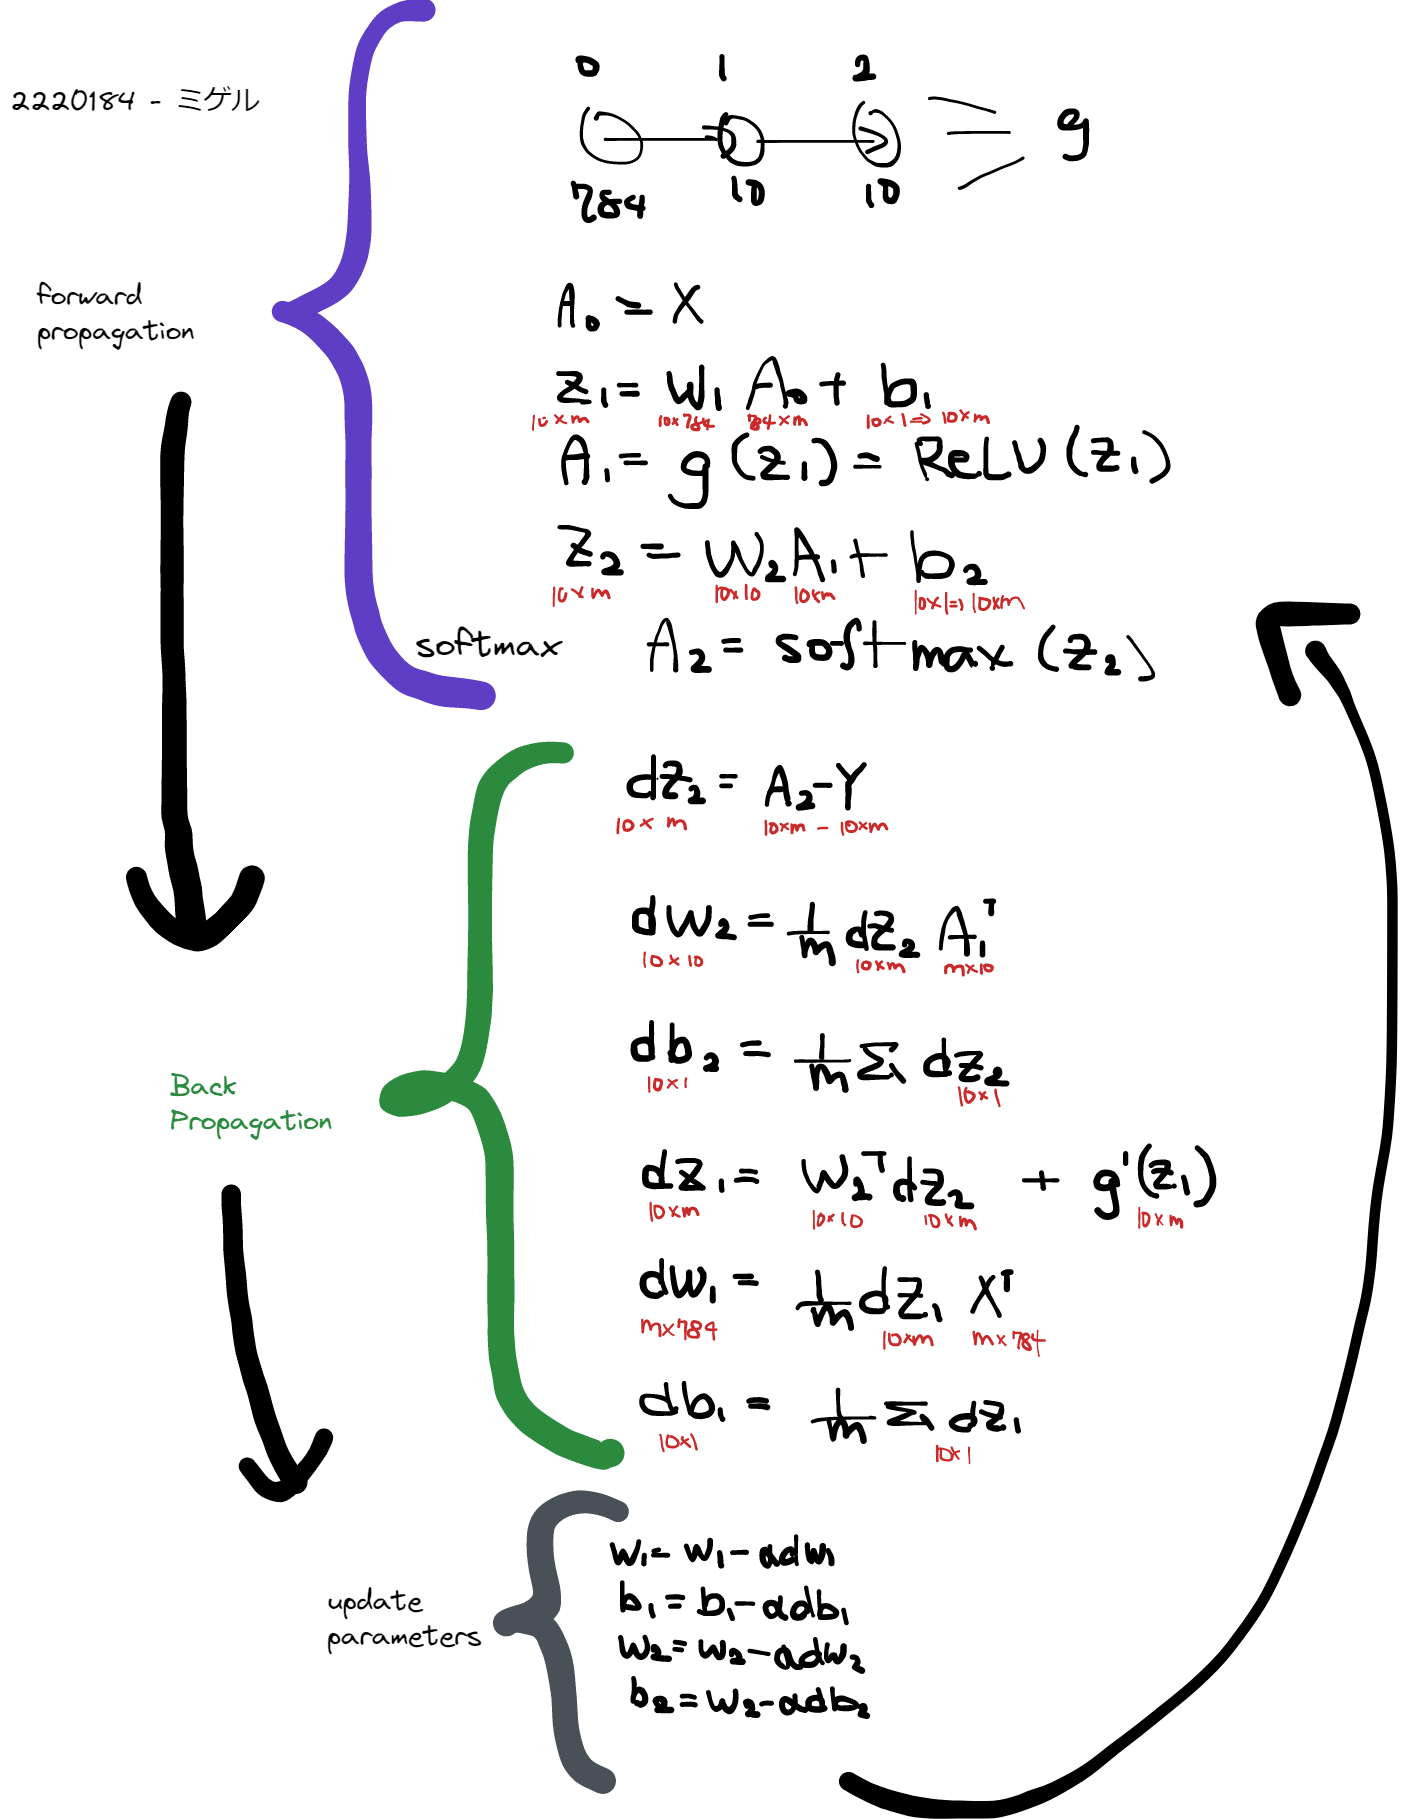

In [77]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("setumei.png")
cv2_imshow(image)

In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("train.csv")

In [79]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)     #練習用とテスト用のデータに分ける前に、シャッフル
data_dev = data[0:1000].T   #785行のデータに

Y_dev = data_dev[0]         #答えとなる行
X_dev = data_dev[1:n]       #表示されている画素の行
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [81]:
data_dev

array([[8, 7, 0, ..., 8, 5, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [82]:
def init_params():                        #後で調整するため、最初は適当でよい
    W1 = np.random.rand(10, 784) - 0.5    #重み
    b1 = np.random.rand(10, 1) - 0.5      #バイアス
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):                            #0以下は0その他はもとの数で表示することで複雑化
    return np.maximum(Z, 0)             #(RelUを利用することで求めたい結果に近づける)

def softmax(Z):                         #確率分布を作りたいので、一つ一つの確率を求める
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):  #実際に重みとバイアスをデータに適応
    #第1層                             
    Z1 = W1.dot(X) + b1                 
    A1 = ReLU(Z1)
    #第2層
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):  #0と1に変換
    return Z > 0

def one_hot(Y):    #調整行列を作成
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))     
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): #変化量の測定
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):  #重みとバイアスを調節
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [83]:
def get_predictions(A2):    #当たる確率が最も高いものを予想に    
    return np.argmax(A2, 0)       

def get_accuracy(predictions, Y):     #予想が当たる確率
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):      #練習をiterations分だけさせる
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [84]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 0 ... 4 6 4] [9 2 7 ... 5 8 8]
0.09502439024390244
Iteration:  10
[4 4 0 ... 4 6 6] [9 2 7 ... 5 8 8]
0.1537560975609756
Iteration:  20
[4 1 0 ... 4 6 6] [9 2 7 ... 5 8 8]
0.23017073170731708
Iteration:  30
[4 1 0 ... 4 6 6] [9 2 7 ... 5 8 8]
0.3076829268292683
Iteration:  40
[4 1 0 ... 4 6 6] [9 2 7 ... 5 8 8]
0.3636341463414634
Iteration:  50
[4 1 0 ... 4 6 6] [9 2 7 ... 5 8 8]
0.41629268292682925
Iteration:  60
[4 1 2 ... 4 6 6] [9 2 7 ... 5 8 8]
0.45739024390243904
Iteration:  70
[4 1 2 ... 4 6 6] [9 2 7 ... 5 8 8]
0.4970731707317073
Iteration:  80
[7 1 7 ... 4 6 6] [9 2 7 ... 5 8 8]
0.5560731707317074
Iteration:  90
[7 1 7 ... 4 8 6] [9 2 7 ... 5 8 8]
0.6009512195121951
Iteration:  100
[7 1 7 ... 4 8 6] [9 2 7 ... 5 8 8]
0.6312926829268293
Iteration:  110
[7 1 7 ... 4 8 8] [9 2 7 ... 5 8 8]
0.6539268292682927
Iteration:  120
[7 1 7 ... 4 8 8] [9 2 7 ... 5 8 8]
0.6731707317073171
Iteration:  130
[7 1 7 ... 4 8 8] [9 2 7 ... 5 8 8]
0.6877073170731707
Iteration:  1

In [85]:
def make_predictions(X, W1, b1, W2, b2):              #予想する
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)     
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):         #予想と結果の常時
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  2


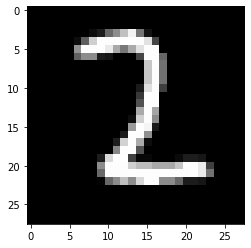

Prediction:  [7]
Label:  7


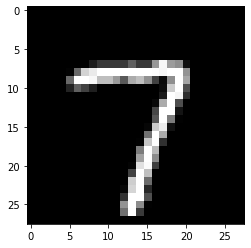

Prediction:  [1]
Label:  1


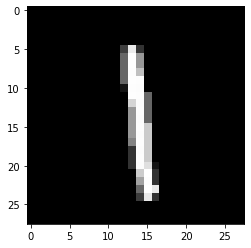

Prediction:  [1]
Label:  1


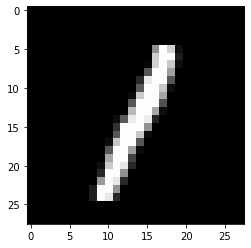

In [86]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)

In [87]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)   #テストで正答率を出す
get_accuracy(dev_predictions, Y_dev)

[8 7 0 6 8 2 8 0 4 9 0 8 1 3 2 6 6 7 5 0 8 9 0 3 6 2 8 0 4 1 5 2 4 1 1 9 0
 9 9 2 1 6 2 8 7 4 9 2 9 2 6 0 4 7 8 4 4 3 6 3 1 6 7 5 5 9 1 4 6 5 2 5 2 1
 1 0 7 5 4 2 8 2 9 6 9 6 3 0 2 5 8 2 3 9 8 8 6 7 6 4 0 8 1 0 5 7 7 4 6 2 5
 8 3 3 1 6 1 8 2 0 2 9 7 3 7 3 3 4 9 1 7 8 7 9 1 8 7 3 6 4 3 5 9 5 9 6 1 6
 9 3 8 3 7 4 6 4 4 0 6 3 0 4 9 9 1 4 7 4 5 1 5 2 7 1 9 2 8 6 3 7 7 3 9 4 6
 0 3 9 0 9 1 0 8 8 2 7 7 0 4 1 0 2 9 8 3 1 9 1 2 9 5 0 9 6 0 1 1 1 8 5 8 6
 2 2 7 8 9 8 8 9 5 0 1 8 0 6 4 8 6 5 4 3 0 2 6 0 5 3 6 5 4 1 6 4 1 3 2 9 3
 5 0 0 8 1 3 7 1 1 4 2 5 3 7 0 2 5 7 0 6 6 1 8 5 0 8 2 7 3 0 8 3 3 4 2 6 8
 0 4 9 6 7 0 2 1 8 3 2 4 0 5 4 4 0 0 5 4 7 3 1 6 2 5 9 4 4 1 4 7 5 1 8 1 4
 4 7 1 9 7 7 3 3 5 0 5 0 1 1 2 6 9 7 2 3 2 8 9 5 8 2 3 0 9 1 4 0 6 5 4 0 3
 7 5 1 0 4 5 6 4 0 8 8 2 3 2 7 3 2 1 6 7 7 9 4 5 5 8 3 6 7 7 4 9 5 1 9 6 5
 9 7 0 1 6 5 6 7 4 8 8 4 0 8 4 9 3 0 0 6 9 3 6 6 1 3 7 1 6 2 5 0 0 6 1 5 7
 1 2 3 1 4 1 8 2 0 1 4 9 1 9 8 7 7 5 2 2 9 8 0 7 8 4 1 1 2 0 7 7 6 8 4 8 9
 4 1 3 0 1 4 8 0 6 8 4 3 

0.844